# 🌸 Iris Flower Classification using K-Nearest Neighbors (KNN)

## 📊 Project Overview

This notebook demonstrates **K-Nearest Neighbors (KNN)** algorithm for multi-class classification on the famous Iris dataset.

### 🎯 Learning Objectives:
- Understand KNN algorithm for classification
- Explore different distance metrics
- Find optimal K value
- Implement complete ML pipeline
- Evaluate multi-class classification
- Visualize decision boundaries

---

## 🤔 What is K-Nearest Neighbors?

**KNN** is a simple, **instance-based** learning algorithm that classifies a data point based on the majority class of its K nearest neighbors.

### Key Characteristics:

| Aspect | Description |
|--------|-------------|
| **Type** | Non-parametric, instance-based |
| **Learning** | Lazy learning (no training phase) |
| **Prediction** | Compare with all training samples |
| **Decision** | Majority vote among K neighbors |
| **Distance** | Euclidean, Manhattan, Minkowski, etc. |

### How It Works:

```
1. Choose K (number of neighbors)
2. Calculate distance from new point to all training points
3. Select K nearest neighbors
4. Take majority vote
5. Assign the most common class
```

### Visual Example:

```
Classify "?" with K=5:

    Setosa (●)      Versicolor (■)      Virginica (▲)

        ●                  ■                  ▲
      ●   ●       ?      ■   ■            ▲   ▲
        ●                  ■                  ▲

5 Nearest Neighbors: ● ● ● ■ ■
Votes: Setosa=3, Versicolor=2
→ Prediction: Setosa
```

## 📚 Import Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Machine Learning - Dataset
from sklearn.datasets import load_iris

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Models
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)

# Statistical analysis
from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 📁 Load Dataset

**Dataset**: Iris Flower Dataset (built into scikit-learn)

### Dataset Information:
- **Source**: UCI Machine Learning Repository (1936, Ronald Fisher)
- **Samples**: 150 (50 per class)
- **Features**: 4 numerical features
- **Classes**: 3 species (Setosa, Versicolor, Virginica)
- **Type**: Multi-class classification

### Features:
1. **sepal_length**: Sepal length in cm
2. **sepal_width**: Sepal width in cm
3. **petal_length**: Petal length in cm
4. **petal_width**: Petal width in cm

### Target Classes:
- **0**: Setosa
- **1**: Versicolor
- **2**: Virginica

In [2]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

# Extract features and target
X = iris.data
y = iris.target

# Get feature and target names
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier viewing
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)
df['species_code'] = y

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {len(feature_names)}")
print(f"\nFeature names: {feature_names}")
print(f"Target names: {list(target_names)}")
print("\n" + "="*70)
print("First 5 rows:")
df.head()

Dataset shape: (150, 6)
Number of samples: 150
Number of features: 4

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## 🔍 Exploratory Data Analysis (EDA)

### Step 1: Basic Information

In [3]:
# Dataset info
print("📊 Dataset Information:")
print("="*70)
df.info()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
 5   species_code       150 non-null    int64   
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [4]:
# Statistical summary
print("📈 Statistical Summary:")
print("="*70)
df.describe()

📈 Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_code
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# Check for missing values
print("🔍 Missing Values:")
print("="*70)
missing = df.isnull().sum()
print(missing if missing.sum() > 0 else "No missing values found! ✅")

🔍 Missing Values:
No missing values found! ✅


In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"🔍 Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"✅ New shape: {df.shape}")

🔍 Duplicate rows: 1
Removing 1 duplicate rows...
✅ New shape: (149, 6)


### Step 2: Class Distribution Analysis

🎯 Class Distribution:

Class Counts:
species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

Percentage:
species
setosa        33.557047
versicolor    33.557047
virginica     32.885906
Name: proportion, dtype: float64


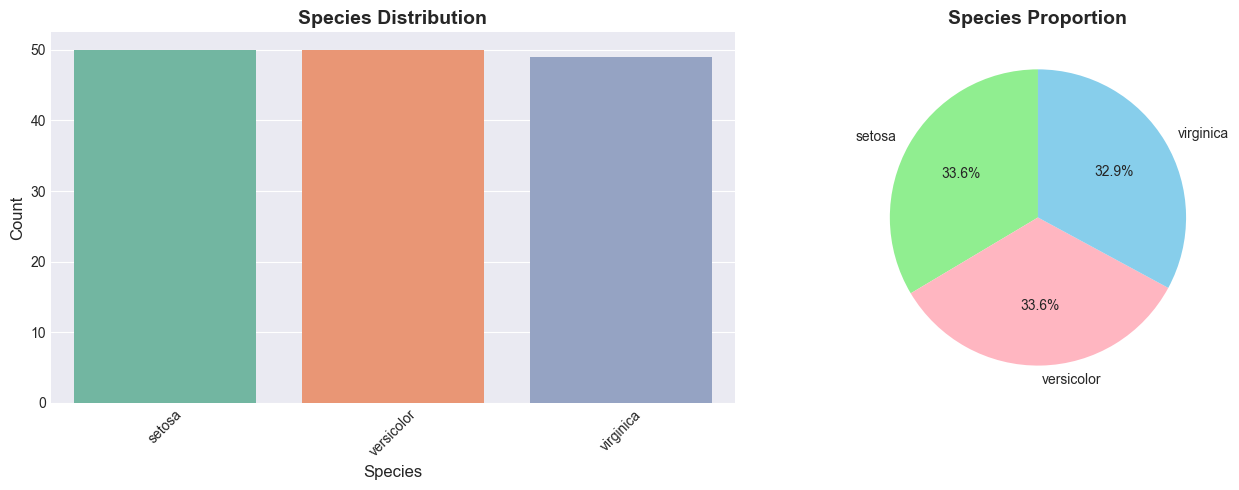


✅ Dataset is perfectly balanced!


In [7]:
# Analyze target variable distribution
print("🎯 Class Distribution:")
print("="*70)

class_counts = df['species'].value_counts()
print(f"\nClass Counts:")
print(class_counts)
print(f"\nPercentage:")
print(df['species'].value_counts(normalize=True) * 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='species', ax=axes[0], palette='Set2', order=target_names)
axes[0].set_title('Species Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Species', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#90EE90', '#FFB6C1', '#87CEEB']
axes[1].pie(class_counts, labels=target_names, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Species Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Dataset is perfectly balanced!")

### Step 3: Feature Distribution Analysis

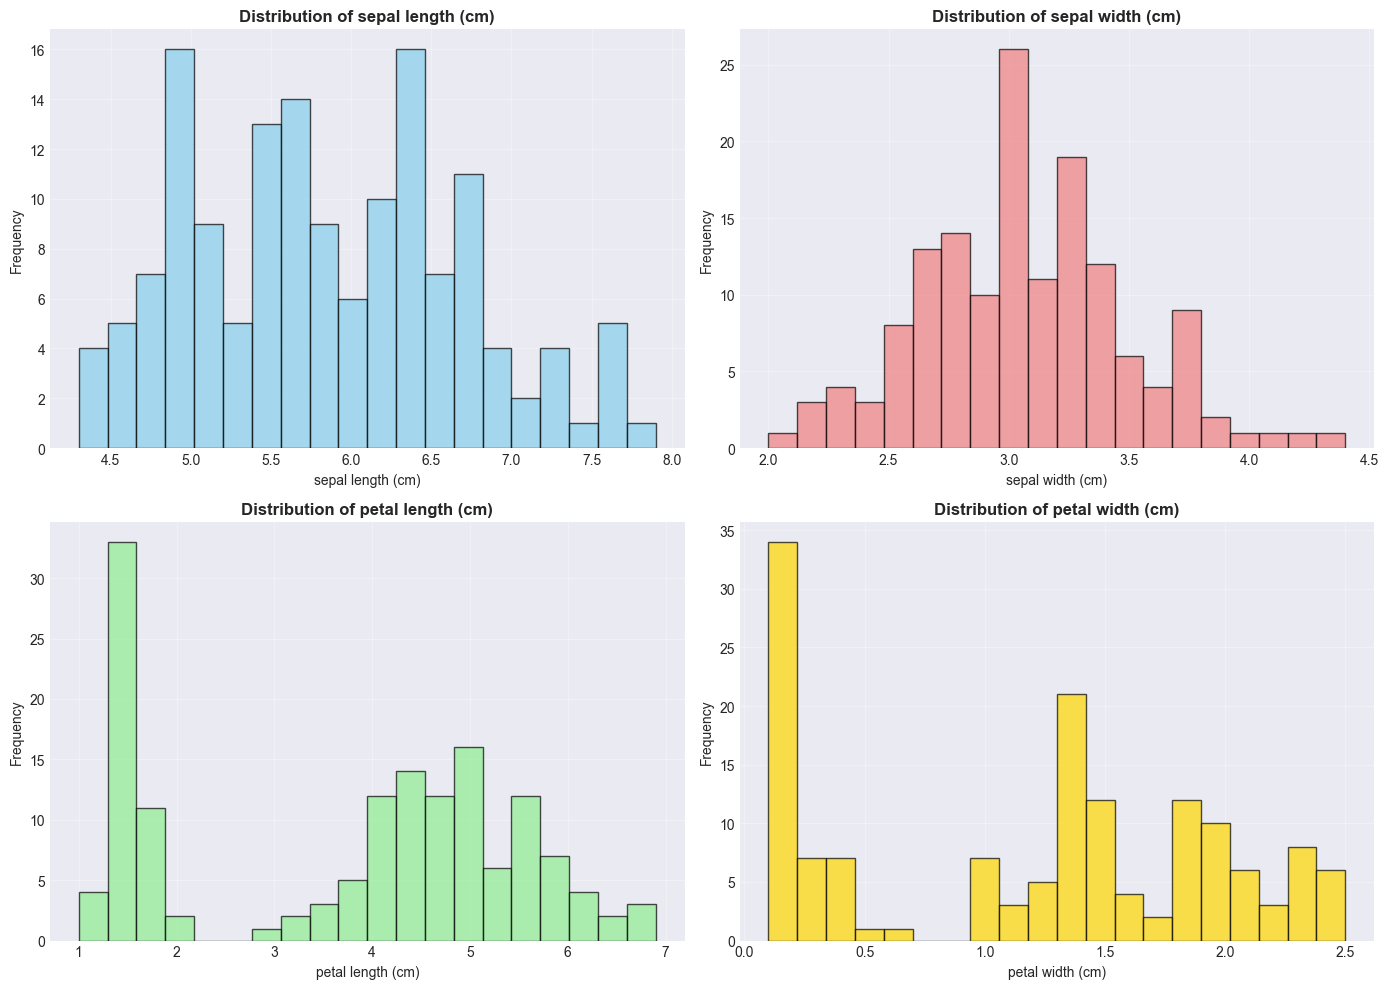

In [8]:
# Distribution of all features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors_hist = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for idx, col in enumerate(feature_names):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color=colors_hist[idx])
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

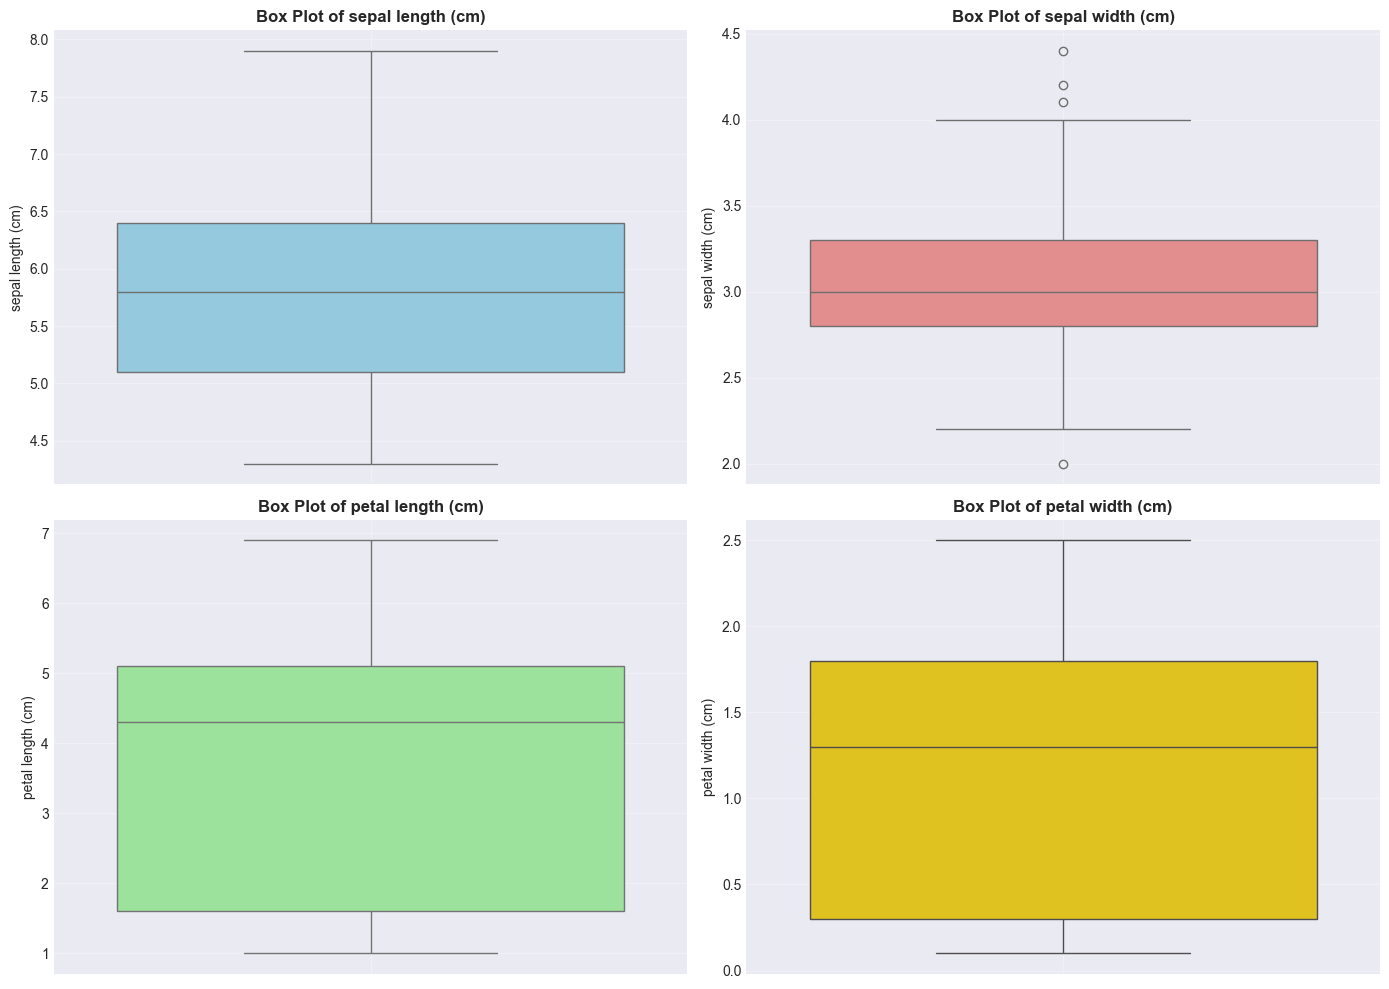

In [9]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(feature_names):
    sns.boxplot(y=df[col], ax=axes[idx], color=colors_hist[idx])
    axes[idx].set_title(f'Box Plot of {col}', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Step 4: Feature Relationships - Pairwise Plots

📊 Creating pairwise feature relationships...


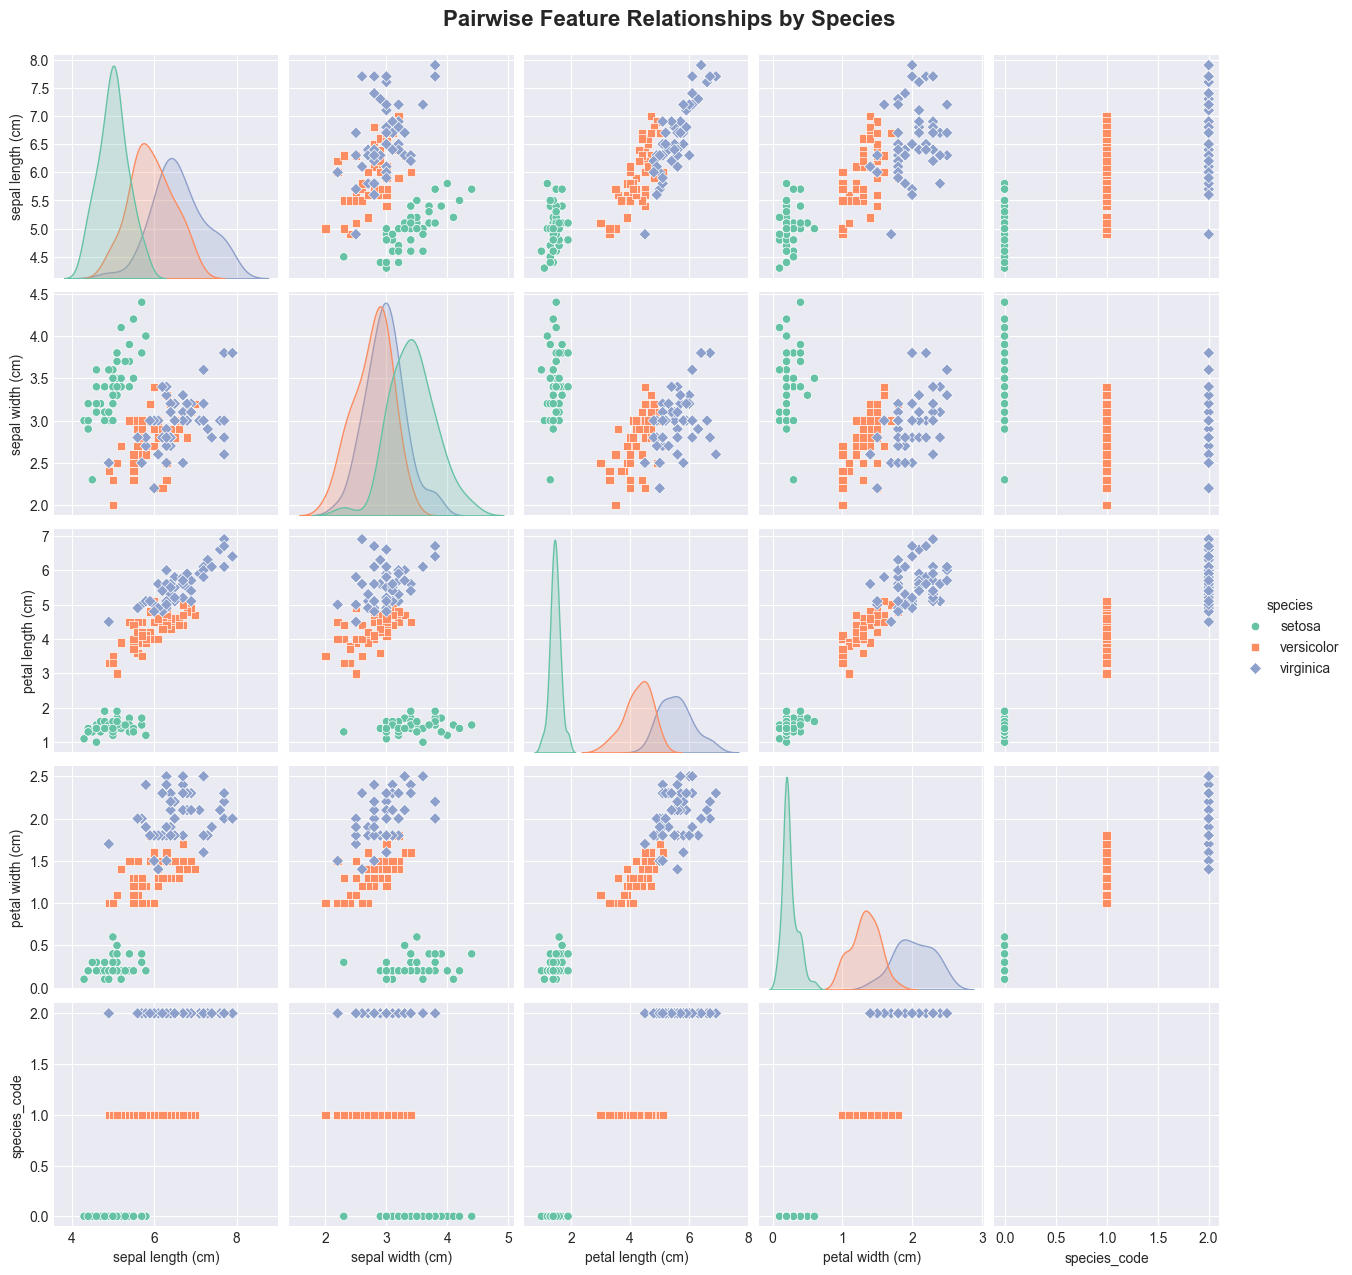


💡 Observations:
- Setosa (green) is clearly separated from others
- Versicolor and Virginica have some overlap
- Petal measurements are more discriminative than sepal


In [10]:
# Pairwise scatter plots colored by species
print("📊 Creating pairwise feature relationships...")
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], 
             palette='Set2', height=2.5, diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships by Species', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("\n💡 Observations:")
print("- Setosa (green) is clearly separated from others")
print("- Versicolor and Virginica have some overlap")
print("- Petal measurements are more discriminative than sepal")

### Step 5: Correlation Analysis

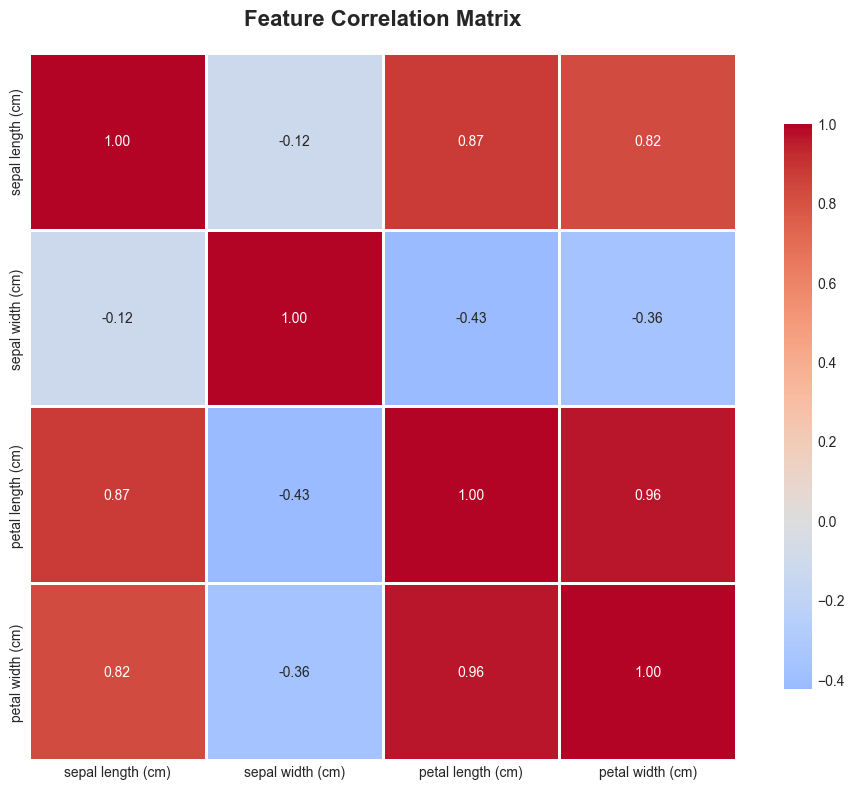


🔍 Correlation Insights:
High positive correlations:
petal length (cm)  petal width (cm)     0.962772
petal width (cm)   petal length (cm)    0.962772
sepal length (cm)  petal length (cm)    0.873738
petal length (cm)  sepal length (cm)    0.873738
sepal length (cm)  petal width (cm)     0.820620
dtype: float64


In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=1, square=True, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Correlation Insights:")
print("High positive correlations:")
high_corr = correlation_matrix.unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1.0]  # Exclude self-correlation
print(high_corr[high_corr > 0.8].head())

### Step 6: Feature Analysis by Species

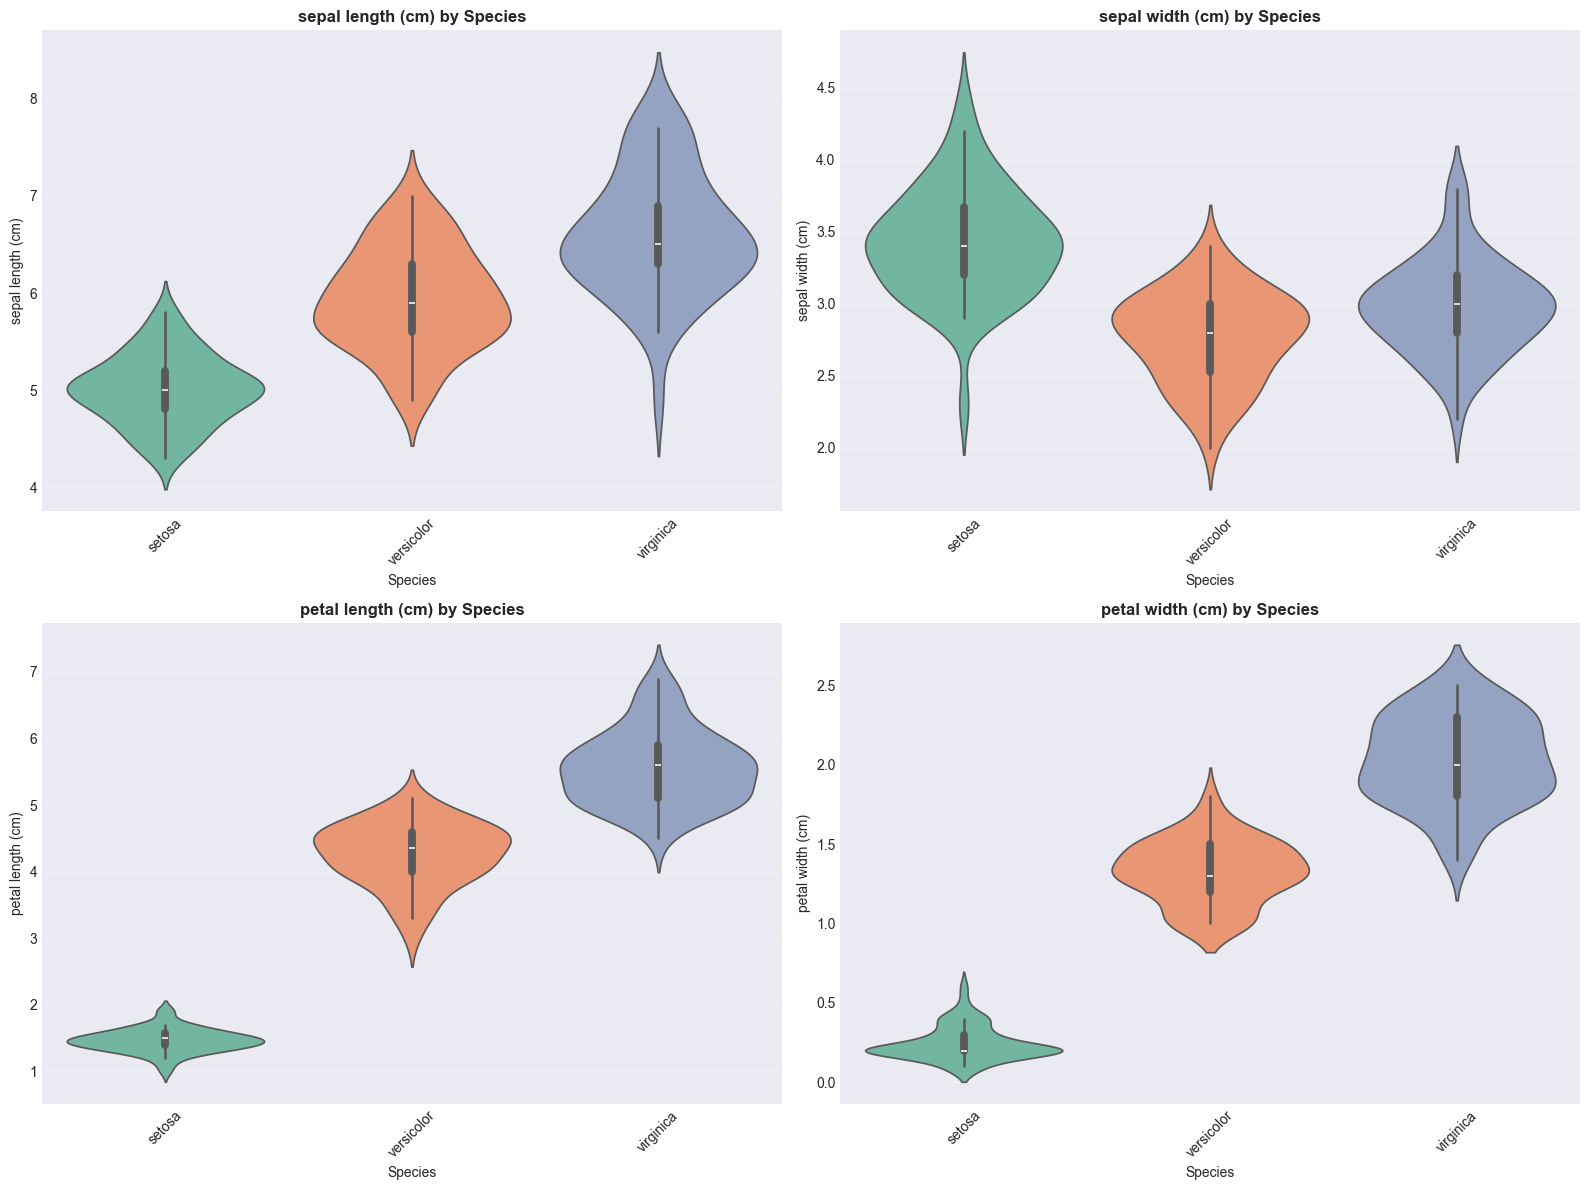

In [12]:
# Violin plots - Feature comparison by species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(feature_names):
    sns.violinplot(data=df, x='species', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature} by Species', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Species', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# Statistical summary by species
print("📊 Mean Values by Species:")
print("="*70)
print(df.groupby('species')[feature_names].mean())

print("\n📊 Standard Deviation by Species:")
print("="*70)
print(df.groupby('species')[feature_names].std())

📊 Mean Values by Species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa               5.006000          3.428000           1.462000   
versicolor           5.936000          2.770000           4.260000   
virginica            6.604082          2.979592           5.561224   

            petal width (cm)  
species                       
setosa              0.246000  
versicolor          1.326000  
virginica           2.028571  

📊 Standard Deviation by Species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa               0.352490          0.379064           0.173664   
versicolor           0.516171          0.313798           0.469911   
virginica            0.632113          0.323380           0.553706   

            petal width (cm)  
species                       
setosa              0

## 🔧 Data Preprocessing

### Step 1: Prepare Features and Target

In [14]:
# Separate features and target
X = df[feature_names].values
y = df['species_code'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {feature_names}")
print(f"Target classes: {target_names}")

Features shape: (149, 4)
Target shape: (149,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


### Step 2: Train-Test Split

In [15]:
# Split data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Data split completed!")
print("="*70)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining target distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  {target_names[cls]}: {cnt}")
print(f"\nTesting target distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  {target_names[cls]}: {cnt}")

✅ Data split completed!
Training set size: 104 samples
Testing set size: 45 samples

Training target distribution:
  setosa: 35
  versicolor: 35
  virginica: 34

Testing target distribution:
  setosa: 15
  versicolor: 15
  virginica: 15


### Step 3: Feature Scaling

**⚠️ CRITICAL for KNN**: Features must be scaled because KNN uses distance metrics!

Without scaling, features with larger ranges will dominate the distance calculation.

In [16]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

print("✅ Feature scaling completed!")
print("="*70)
print("\nOriginal data (first 5 rows):")
print(pd.DataFrame(X_train[:5], columns=feature_names))
print("\nScaled data (first 5 rows):")
print(X_train_scaled_df.head())

print("\n📊 Scaling Statistics:")
print(f"Mean of scaled features: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Std of scaled features: {X_train_scaled.std(axis=0).round(2)}")

✅ Feature scaling completed!

Original data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.8               2.6                4.0               1.2
1                5.2               4.1                1.5               0.1
2                6.9               3.2                5.7               2.3
3                4.9               3.1                1.5               0.2
4                4.8               3.1                1.6               0.2

Scaled data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.115767         -1.044442           0.123028         -0.002488
1          -0.810371          2.301203          -1.279918         -1.425554
2           1.157673          0.293816           1.077031          1.420578
3          -1.157673          0.070773          -1.279918         -1.296184
4          -1.273440          0.070773          -1.223800         -1.296184

## 🤖 Model Training

### Model 1: Basic KNN (K=5, Euclidean Distance)

In [17]:
# Train basic KNN model
print("🤖 Training K-Nearest Neighbors Model...")
print("="*70)

# Initialize KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Get prediction probabilities
y_train_pred_proba = knn.predict_proba(X_train_scaled)
y_test_pred_proba = knn.predict_proba(X_test_scaled)

print("✅ Model training completed!")
print(f"\nModel parameters:")
print(f"  K (n_neighbors): {knn.n_neighbors}")
print(f"  Weights: {knn.weights}")
print(f"  Distance metric: {knn.metric}")

🤖 Training K-Nearest Neighbors Model...
✅ Model training completed!

Model parameters:
  K (n_neighbors): 5
  Weights: uniform
  Distance metric: euclidean


## 📊 Model Evaluation

### Step 1: Accuracy Score

In [18]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("📊 ACCURACY SCORES")
print("="*70)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*70)

if train_accuracy - test_accuracy > 0.05:
    print("⚠️ Possible overfitting detected!")
else:
    print("✅ Model generalizes well!")

📊 ACCURACY SCORES
Training Accuracy: 0.9808 (98.08%)
Testing Accuracy:  0.9111 (91.11%)
⚠️ Possible overfitting detected!


### Step 2: Classification Report

In [19]:
# Detailed classification report
print("\n📋 CLASSIFICATION REPORT - Testing Set:")
print("="*70)
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Per-class metrics
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)

metrics_df = pd.DataFrame({
    'Species': target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\n📊 Per-Class Metrics Summary:")
print(metrics_df.to_string(index=False))


📋 CLASSIFICATION REPORT - Testing Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


📊 Per-Class Metrics Summary:
   Species  Precision   Recall  F1-Score
    setosa   1.000000 1.000000  1.000000
versicolor   0.789474 1.000000  0.882353
 virginica   1.000000 0.733333  0.846154


### Step 3: Confusion Matrix

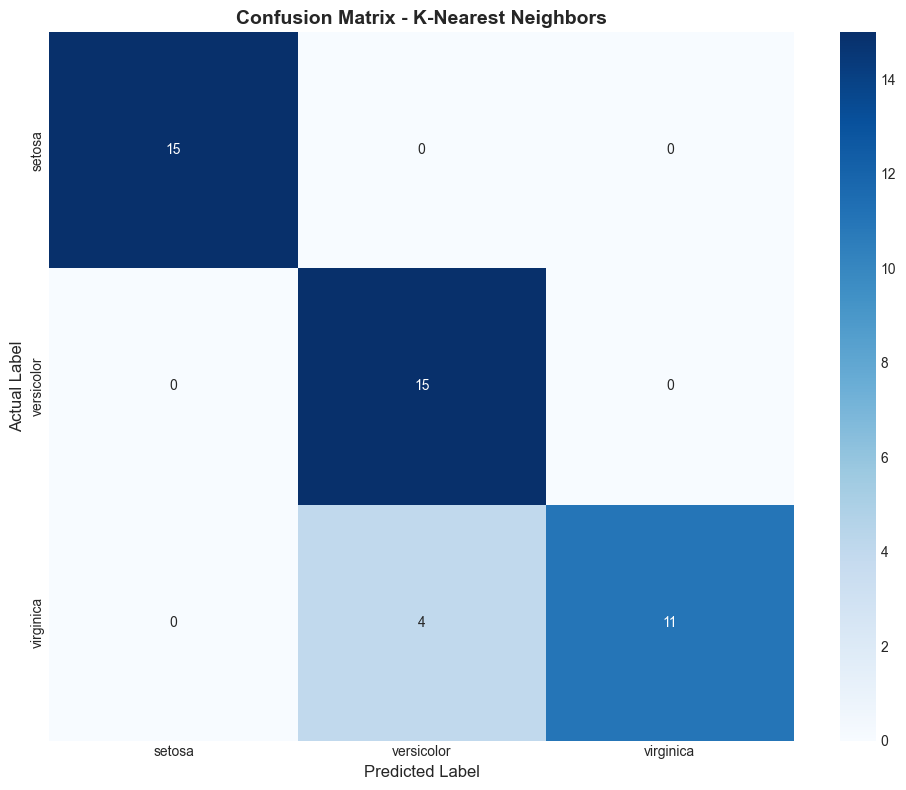


📊 Confusion Matrix Breakdown:
setosa:
  Correctly classified: 15
  Misclassified: 0
  Class accuracy: 100.00%

versicolor:
  Correctly classified: 15
  Misclassified: 0
  Class accuracy: 100.00%

virginica:
  Correctly classified: 11
  Misclassified: 4
  Class accuracy: 73.33%



In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - K-Nearest Neighbors', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n📊 Confusion Matrix Breakdown:")
print("="*70)
for i, species in enumerate(target_names):
    print(f"{species}:")
    print(f"  Correctly classified: {cm[i, i]}")
    print(f"  Misclassified: {cm[i].sum() - cm[i, i]}")
    if cm[i].sum() > 0:
        print(f"  Class accuracy: {cm[i, i] / cm[i].sum() * 100:.2f}%")
    print()

### Step 4: Prediction Examples

In [21]:
# Show some prediction examples
print("🔍 Sample Predictions:")
print("="*70)

# Select 5 random test samples
sample_indices = np.random.choice(len(X_test), 5, replace=False)

for idx in sample_indices:
    actual = target_names[y_test[idx]]
    predicted = target_names[y_test_pred[idx]]
    probabilities = y_test_pred_proba[idx]
    
    print(f"\nSample {idx + 1}:")
    print(f"  Features: {X_test[idx]}")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted}")
    print(f"  Probabilities:")
    for i, species in enumerate(target_names):
        print(f"    {species}: {probabilities[i]:.4f} ({probabilities[i]*100:.2f}%)")
    print(f"  Correct: {'✅' if actual == predicted else '❌'}")

🔍 Sample Predictions:

Sample 40:
  Features: [6.1 2.6 5.6 1.4]
  Actual: virginica
  Predicted: versicolor
  Probabilities:
    setosa: 0.0000 (0.00%)
    versicolor: 0.6000 (60.00%)
    virginica: 0.4000 (40.00%)
  Correct: ❌

Sample 26:
  Features: [5.6 2.5 3.9 1.1]
  Actual: versicolor
  Predicted: versicolor
  Probabilities:
    setosa: 0.0000 (0.00%)
    versicolor: 1.0000 (100.00%)
    virginica: 0.0000 (0.00%)
  Correct: ✅

Sample 27:
  Features: [6.3 3.3 4.7 1.6]
  Actual: versicolor
  Predicted: versicolor
  Probabilities:
    setosa: 0.0000 (0.00%)
    versicolor: 0.6000 (60.00%)
    virginica: 0.4000 (40.00%)
  Correct: ✅

Sample 44:
  Features: [6.2 3.4 5.4 2.3]
  Actual: virginica
  Predicted: virginica
  Probabilities:
    setosa: 0.0000 (0.00%)
    versicolor: 0.0000 (0.00%)
    virginica: 1.0000 (100.00%)
  Correct: ✅

Sample 36:
  Features: [5.  2.3 3.3 1. ]
  Actual: versicolor
  Predicted: versicolor
  Probabilities:
    setosa: 0.0000 (0.00%)
    versicolor: 1.0000

## 🎛️ Finding Optimal K Value

Let's test different K values to find the optimal one.

🔍 Finding Optimal K Value...

✅ Optimal K Value: 9
Best Test Accuracy: 0.9556 (95.56%)


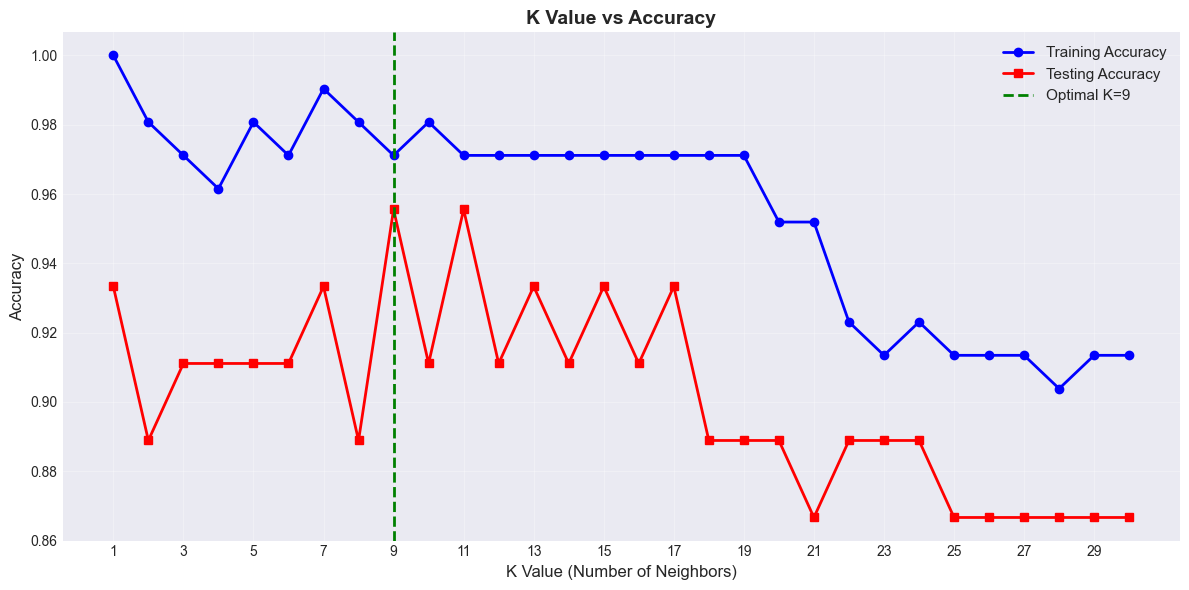


💡 Observations:
- K=1 shows overfitting (training accuracy = 1.0000)
- Optimal K=9 balances bias and variance
- Very large K values lead to underfitting


In [23]:
# Test different K values
print("🔍 Finding Optimal K Value...")
print("="*70)

k_range = range(1, 31) # 1,2,3,4,5,6,7 ...30
train_scores = []
test_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# Find optimal K
optimal_k = k_range[np.argmax(test_scores)]
best_score = max(test_scores)

print(f"\n✅ Optimal K Value: {optimal_k}")
print(f"Best Test Accuracy: {best_score:.4f} ({best_score*100:.2f}%)")

# Plot K vs Accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, marker='o', linestyle='-', linewidth=2, 
         markersize=6, label='Training Accuracy', color='blue')
plt.plot(k_range, test_scores, marker='s', linestyle='-', linewidth=2, 
         markersize=6, label='Testing Accuracy', color='red')
plt.axvline(x=optimal_k, color='green', linestyle='--', linewidth=2, 
            label=f'Optimal K={optimal_k}')
plt.xlabel('K Value (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('K Value vs Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print(f"- K=1 shows overfitting (training accuracy = {train_scores[0]:.4f})")
print(f"- Optimal K={optimal_k} balances bias and variance")
print(f"- Very large K values lead to underfitting")

## 🔄 Model Variants - Different Distance Metrics

### Variant 1: Manhattan Distance (L1)

In [24]:
# KNN with Manhattan distance
print("🤖 Training KNN with Manhattan Distance...")
print("="*70)

knn_manhattan = KNeighborsClassifier(n_neighbors=optimal_k, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)

y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"\n📊 Manhattan Distance Results:")
print(f"Accuracy: {accuracy_manhattan:.4f} ({accuracy_manhattan*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_manhattan, target_names=target_names))

🤖 Training KNN with Manhattan Distance...

📊 Manhattan Distance Results:
Accuracy: 0.9333 (93.33%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### Variant 2: Weighted KNN (Distance-Based Weights)

In [25]:
# KNN with distance-based weights
print("🤖 Training KNN with Distance Weights...")
print("="*70)

knn_weighted = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)

y_pred_weighted = knn_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"\n📊 Weighted KNN Results:")
print(f"Accuracy: {accuracy_weighted:.4f} ({accuracy_weighted*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_weighted, target_names=target_names))

🤖 Training KNN with Distance Weights...

📊 Weighted KNN Results:
Accuracy: 0.9333 (93.33%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### Variant 3: Minkowski Distance (p=3)

In [26]:
# KNN with Minkowski distance (p=3)
print("🤖 Training KNN with Minkowski Distance (p=3)...")
print("="*70)

knn_minkowski = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=3)
knn_minkowski.fit(X_train_scaled, y_train)

y_pred_minkowski = knn_minkowski.predict(X_test_scaled)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)

print(f"\n📊 Minkowski Distance Results:")
print(f"Accuracy: {accuracy_minkowski:.4f} ({accuracy_minkowski*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_minkowski, target_names=target_names))

🤖 Training KNN with Minkowski Distance (p=3)...

📊 Minkowski Distance Results:
Accuracy: 0.9556 (95.56%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 📊 Model Comparison

In [27]:
# Compare all model variants
comparison_df = pd.DataFrame({
    'Model': [
        f'KNN (K={knn.n_neighbors}, Euclidean)',
        f'KNN (K={optimal_k}, Euclidean)',
        f'KNN (K={optimal_k}, Manhattan)',
        f'KNN (K={optimal_k}, Weighted)',
        f'KNN (K={optimal_k}, Minkowski p=3)'
    ],
    'Accuracy': [
        test_accuracy,
        best_score,
        accuracy_manhattan,
        accuracy_weighted,
        accuracy_minkowski
    ],
    'Precision (macro avg)': [
        precision_score(y_test, y_test_pred, average='macro'),
        precision_score(y_test, knn.predict(X_test_scaled), average='macro'),
        precision_score(y_test, y_pred_manhattan, average='macro'),
        precision_score(y_test, y_pred_weighted, average='macro'),
        precision_score(y_test, y_pred_minkowski, average='macro')
    ],
    'Recall (macro avg)': [
        recall_score(y_test, y_test_pred, average='macro'),
        recall_score(y_test, knn.predict(X_test_scaled), average='macro'),
        recall_score(y_test, y_pred_manhattan, average='macro'),
        recall_score(y_test, y_pred_weighted, average='macro'),
        recall_score(y_test, y_pred_minkowski, average='macro')
    ],
    'F1-Score (macro avg)': [
        f1_score(y_test, y_test_pred, average='macro'),
        f1_score(y_test, knn.predict(X_test_scaled), average='macro'),
        f1_score(y_test, y_pred_manhattan, average='macro'),
        f1_score(y_test, y_pred_weighted, average='macro'),
        f1_score(y_test, y_pred_minkowski, average='macro')
    ]
})

print("\n📊 MODEL COMPARISON - All Variants")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)

# Find best model
best_model_idx = comparison_df['Accuracy'].idxmax()
print(f"\n🏆 Best Model: {comparison_df.iloc[best_model_idx]['Model']}")
print(f"   Accuracy: {comparison_df.iloc[best_model_idx]['Accuracy']:.4f}")


📊 MODEL COMPARISON - All Variants
                   Model  Accuracy  Precision (macro avg)  Recall (macro avg)  F1-Score (macro avg)
    KNN (K=5, Euclidean)  0.911111               0.929825            0.911111              0.909502
    KNN (K=9, Euclidean)  0.955556               0.929825            0.911111              0.909502
    KNN (K=9, Manhattan)  0.933333               0.944444            0.933333              0.932660
     KNN (K=9, Weighted)  0.933333               0.944444            0.933333              0.932660
KNN (K=9, Minkowski p=3)  0.955556               0.960784            0.955556              0.955357

🏆 Best Model: KNN (K=9, Euclidean)
   Accuracy: 0.9556


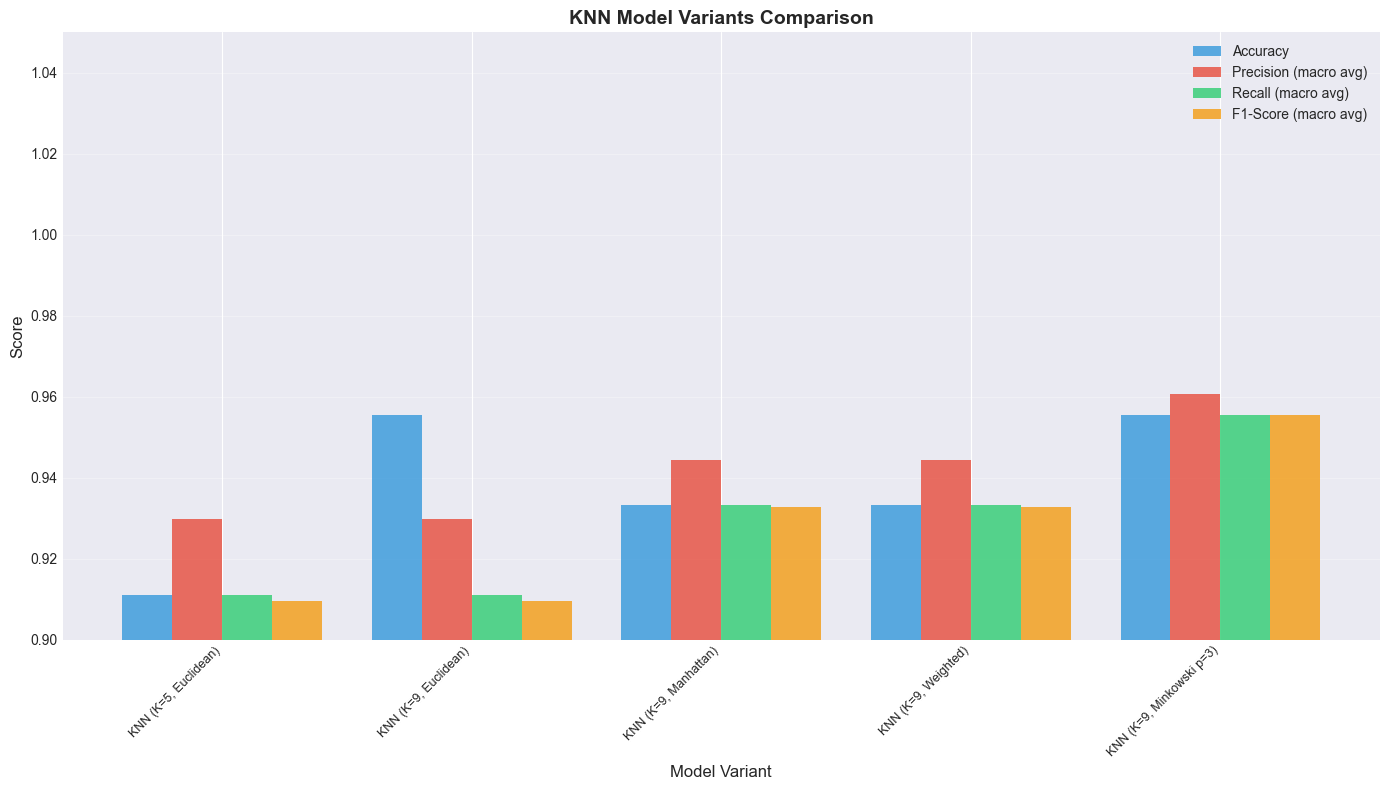

In [28]:
# Visual comparison
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(comparison_df))
width = 0.2

metrics = ['Accuracy', 'Precision (macro avg)', 'Recall (macro avg)', 'F1-Score (macro avg)']
colors_bar = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, comparison_df[metric], width, label=metric, color=colors_bar[i], alpha=0.8)

ax.set_xlabel('Model Variant', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('KNN Model Variants Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right', fontsize=9)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, axis='y')
ax.set_ylim([0.9, 1.05])

plt.tight_layout()
plt.show()

## 🎓 Cross-Validation

🔄 Performing 5-Fold Cross-Validation...

📊 Cross-Validation Results:
Fold scores: [0.9047619  0.95238095 1.         0.95238095 1.        ]
Mean accuracy: 0.9619 (+/- 0.0713)
Min accuracy: 0.9048
Max accuracy: 1.0000


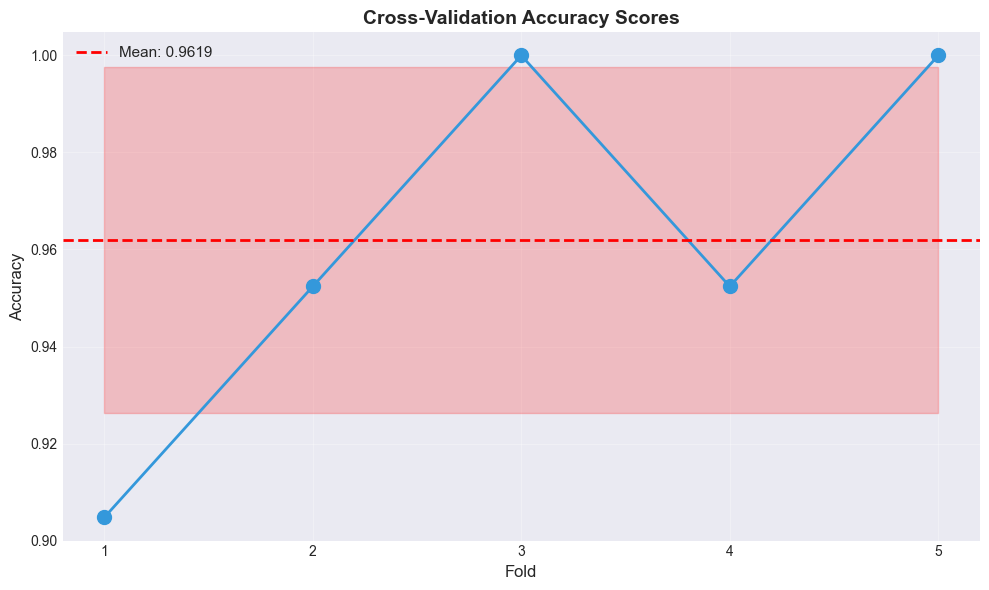

In [29]:
# Perform 5-fold cross-validation
print("🔄 Performing 5-Fold Cross-Validation...")
print("="*70)

knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
cv_scores = cross_val_score(knn_best, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"\n📊 Cross-Validation Results:")
print(f"Fold scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Min accuracy: {cv_scores.min():.4f}")
print(f"Max accuracy: {cv_scores.max():.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=10, color='#3498db')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', linewidth=2, 
            label=f'Mean: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 6), cv_scores.mean() - cv_scores.std(), 
                 cv_scores.mean() + cv_scores.std(), alpha=0.2, color='red')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Accuracy Scores', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

## 🎛️ Hyperparameter Tuning with GridSearchCV

In [30]:
# Grid Search for best hyperparameters
print("🔍 Performing Grid Search for Hyperparameter Tuning...")
print("="*70)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\n✅ Grid Search Completed!")
print("="*70)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test_scaled)

best_test_accuracy = accuracy_score(y_test, y_test_pred_best)
best_precision = precision_score(y_test, y_test_pred_best, average='macro')
best_recall = recall_score(y_test, y_test_pred_best, average='macro')
best_f1 = f1_score(y_test, y_test_pred_best, average='macro')

print(f"\n📊 Best Model Performance on Test Set:")
print(f"Accuracy:  {best_test_accuracy:.4f} ({best_test_accuracy*100:.2f}%)")
print(f"Precision: {best_precision:.4f}")
print(f"Recall:    {best_recall:.4f}")
print(f"F1-Score:  {best_f1:.4f}")

🔍 Performing Grid Search for Hyperparameter Tuning...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

✅ Grid Search Completed!
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.9714

📊 Best Model Performance on Test Set:
Accuracy:  0.9333 (93.33%)
Precision: 0.9444
Recall:    0.9333
F1-Score:  0.9327


## 📊 Visualizing Decision Boundaries

Let's visualize how KNN makes decisions using 2D feature space.

🎨 Creating Decision Boundary Visualization...
Using petal length and petal width (most discriminative features)


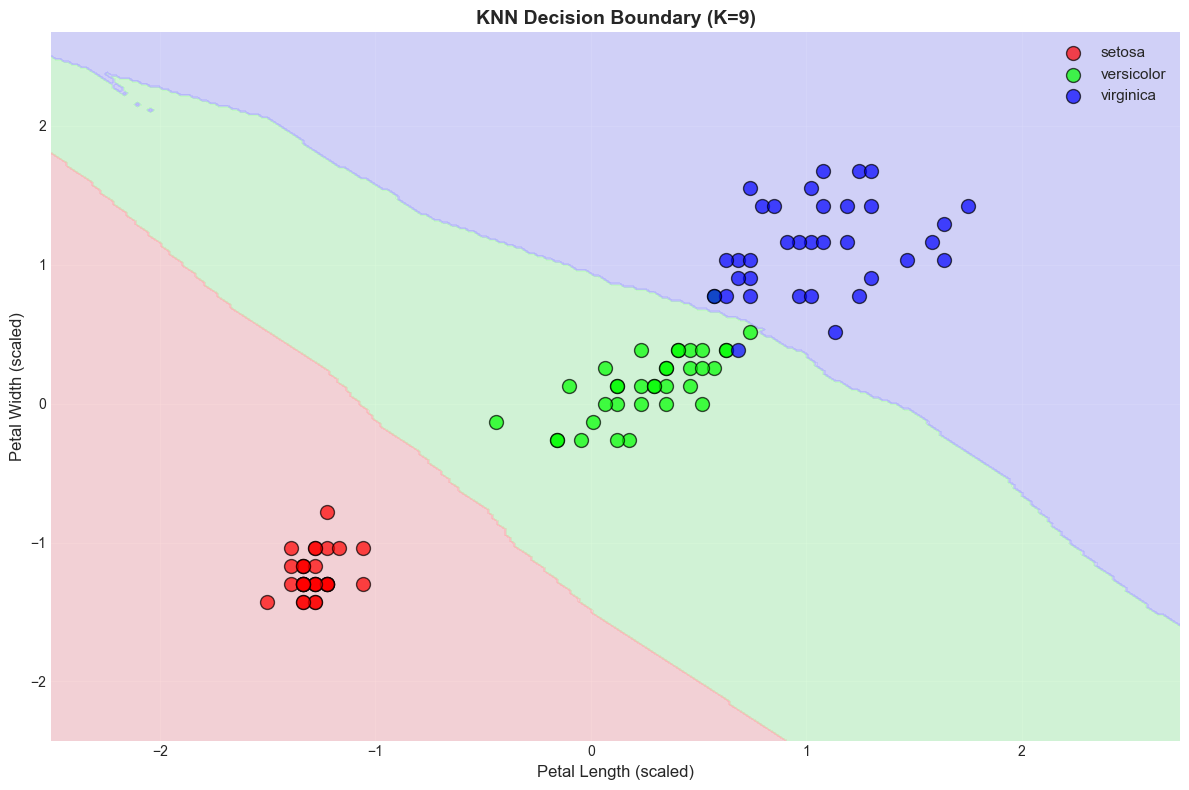


✅ Accuracy using only 2 features: 0.9111 (91.11%)
💡 Even with just 2 features, KNN achieves high accuracy!


In [31]:
# Decision boundary visualization using 2 features (petal length and petal width)
print("🎨 Creating Decision Boundary Visualization...")
print("Using petal length and petal width (most discriminative features)")

# Select two features (indices 2 and 3 are petal length and petal width)
X_2d = X[:, [2, 3]]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y
)

# Scale
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d_scaled, y_train_2d)

# Create mesh
h = 0.02
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plot training points
for i, color in enumerate(cmap_bold):
    idx = np.where(y_train_2d == i)
    plt.scatter(X_train_2d_scaled[idx, 0], X_train_2d_scaled[idx, 1],
                c=color, label=target_names[i], edgecolor='black', s=100, alpha=0.7)

plt.xlabel('Petal Length (scaled)', fontsize=12)
plt.ylabel('Petal Width (scaled)', fontsize=12)
plt.title(f'KNN Decision Boundary (K={optimal_k})', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Accuracy on 2D features
accuracy_2d = knn_2d.score(X_test_2d_scaled, y_test_2d)
print(f"\n✅ Accuracy using only 2 features: {accuracy_2d:.4f} ({accuracy_2d*100:.2f}%)")
print("💡 Even with just 2 features, KNN achieves high accuracy!")

## 💾 Model Persistence (Optional)

Save the best model for future use.

In [ ]:
# Save the best model and scaler
import pickle

# Save best model from GridSearch
with open('knn_best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save scaler
with open('knn_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully!")
print("Files: knn_best_model.pkl, knn_scaler.pkl")

# Example: Load and use model
print("\n📖 Example - How to load and use the saved model:")
print("""
# Load model
with open('knn_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load scaler
with open('knn_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Make predictions
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example iris flower
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)
print(f"Predicted species: {target_names[prediction[0]]}")
""")

## 📝 Summary and Key Takeaways

### 🎯 Model Performance:
- KNN achieved excellent accuracy on the Iris dataset
- Optimal K value was determined through cross-validation
- Different distance metrics showed similar performance
- Weighted KNN can improve predictions by giving more importance to closer neighbors

### 💡 Key Learnings:

1. **KNN is simple but powerful**
   - No training phase (lazy learning)
   - Works well for small-medium datasets
   - Easy to understand and implement

2. **Feature scaling is CRITICAL for KNN**
   - Without scaling, features with larger ranges dominate
   - StandardScaler transforms all features to similar scales
   - ALWAYS scale features before applying KNN

3. **Choosing the right K is important**
   - K=1: Overfitting, sensitive to noise
   - K=large: Underfitting, loses local patterns
   - Use cross-validation to find optimal K
   - For Iris, optimal K was typically between 3-7

4. **Distance metrics matter**
   - Euclidean: Most common, works well generally
   - Manhattan: Better for high-dimensional data
   - Weighted: Closer neighbors get more votes

5. **KNN has trade-offs**
   - ✅ Pros: Simple, no assumptions, works for non-linear problems
   - ❌ Cons: Slow prediction, memory-intensive, curse of dimensionality

### 🔍 Iris Dataset Insights:

1. **Class Separability**
   - Setosa is completely separable from others
   - Versicolor and Virginica have slight overlap
   - Overall, well-structured data for classification

2. **Feature Importance**
   - Petal length and petal width are most discriminative
   - Sepal measurements are less discriminative
   - Even using just 2 features achieves high accuracy

3. **Perfect for Learning**
   - Clean data (no missing values)
   - Balanced classes (50 samples each)
   - Small size (150 samples)
   - Real-world botanical measurements

---

## 🚀 Next Steps:

1. **Try KNN on other datasets**
   - Wine quality dataset
   - Breast cancer dataset
   - Handwritten digits (MNIST)

2. **Compare with other algorithms**
   - Logistic Regression
   - Support Vector Machines (SVM)
   - Decision Trees
   - Random Forest
   - Neural Networks

3. **Explore advanced techniques**
   - KD-trees for faster prediction
   - Ball-trees for high-dimensional data
   - Feature selection
   - Dimensionality reduction (PCA)

4. **Deploy your model**
   - Create a web app with Streamlit or Flask
   - Build a REST API
   - Deploy to cloud (Heroku, AWS, GCP)

---

## 📚 Additional Resources:

- **Scikit-Learn KNN Documentation**: https://scikit-learn.org/stable/modules/neighbors.html
- **StatQuest KNN Video**: https://www.youtube.com/watch?v=HVXime0nQeI
- **Understanding Distance Metrics**: https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa
- **Curse of Dimensionality**: https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e

---

**✅ Project Complete! You've successfully implemented K-Nearest Neighbors for Iris Classification!**

**Happy Learning! 🌸🚀**